In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
d = pd.read_csv("/Users/joshsteinbecker/jts_project/Data/PNA Flu Mortality USA ,SELECT National.csv",header= 3)
df = pd.DataFrame(d)

In [85]:
noage = df[df.age == "All"]
df['week'] = df["MMWR Year/Week"] % (df['MMWR Year/Week'] - (df["MMWR Year/Week"] % 100))
df['year'] = (df['MMWR Year/Week'] - (df["MMWR Year/Week"] % 100)) // 100
df = df[df.age == "All"]
df = df.sort_values(by='MMWR Year/Week')
df['partial year'] = df['year'] + (df['week'] / 52)
df

,geoid,age,season,MMWR Year/Week,Deaths from influenza,Deaths from pneumonia,Deaths from pneumonia and influenza,All Deaths,Pecent of deaths due to pneumonia or influenza,week,year,partial year
1683,National,All,2009-10,200940,149,3484,3633,46412,7.827717,40,2009,2009.769231
429,National,All,2009-10,200941,174,3703,3877,46453,8.346070,41,2009,2009.788462
1855,National,All,2009-10,200942,239,3841,4080,47451,8.598344,42,2009,2009.807692
1528,National,All,2009-10,200943,295,3762,4057,46432,8.737509,43,2009,2009.826923
1862,National,All,2009-10,200944,298,3858,4156,47372,8.773115,44,2009,2009.846154
...,...,...,...,...,...,...,...,...,...,...,...,...
183,National,All,2018-19,201908,396,3566,3962,52764,7.508908,8,2019,2019.153846
294,National,All,2018-19,201909,440,3240,3680,50781,7.246805,9,2019,2019.173077
136,National,All,2018-19,201910,445,3072,3517,49666,7.081303,10,2019,2019.192308
243,National,All,2018-19,201911,373,2956,3329,45228,7.360485,11,2019,2019.211538


In [86]:
x = df["partial year"]
y = df['Deaths from pneumonia']

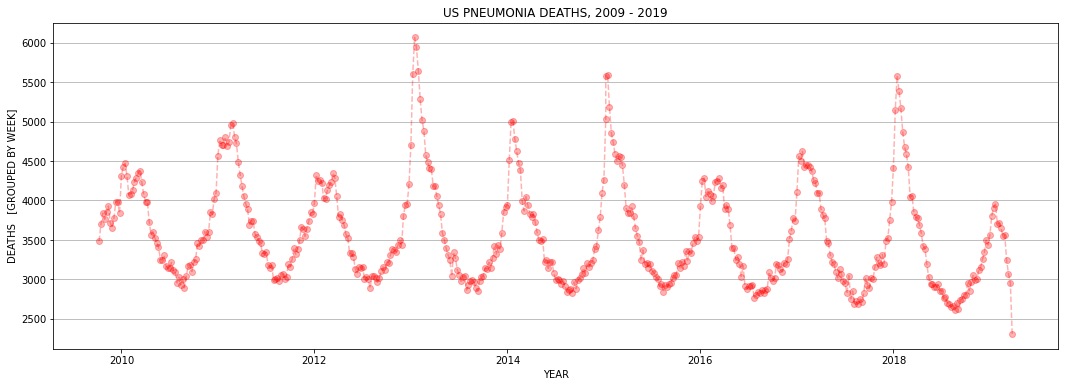

In [91]:
#fig, ax = plt.subplots()
plt.figure(figsize=(18,6))
plt.xlabel('YEAR')
plt.ylabel('DEATHS   [GROUPED BY WEEK]')
plt.title('US PNEUMONIA DEATHS, 2009 - 2019')
plt.grid(which="major",axis="y")
plt.plot(x,y,"o--",alpha=0.3,color="red")

In [92]:
print("Weekly Deaths, min, max:",min(y),max(y))
print("TOTAL: ",sum(y))

Weekly Deaths, min, max: 2309 6065
TOTAL:  1762858


Text(0.5, 1.0, 'WEEK vs PNA DEATHS, USA, 2009-2019')

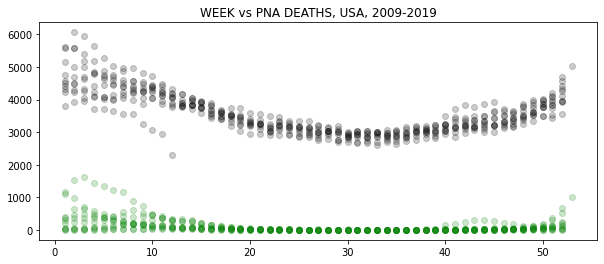

In [118]:
plt.figure(figsize = (10,4))
plt.scatter(df['week'],df['Deaths from pneumonia'],alpha=0.2,color='black')
plt.scatter(df['week'],df['Deaths from influenza'],alpha=0.2,color='green')
plt.title("WEEK vs PNA DEATHS, USA, 2009-2019")